# <center>Laboratorium 10<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, uzupełnić plik main.py, wykonać test na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

***Materiały przygotowujące:***


In [1]:
import main
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import scipy.linalg
from numpy.polynomial import polynomial as P

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań nieliniowych lub inaczej mówiąc metodami znajdowania miejsc zerowych funkcji.
W związku z tym podczas zajęć będziemy rozważać następujący problem:

Dana jest funkcja $f(x)$, należy wyznaczyć argumenty funkcji $x$, dla których $f(x) = 0$ (funkcja jest równa zero). 

Argumenty $x^*$, dla których $f(x)=0$ nazywamy *pierwiastkami*.

Funkcja i jej pochodne zostały zaimplementowane w *main.py*

***Zadanie 1.***  
Dany jest wielomian postaci $W(x)=(x-1)(x-2)\cdot \ldots \cdot (x-20)$.

1. Zdefinuj funkcję *polly_A*, która obliczy współczynniki wielomianu $a_i$ w postaci ogólnej wielomianu $w(x)=a_nx^n+\ldots +a_2x^2+a_1x+1$. Skonstruuj wektor tych współczynników. Użyj funkcji [polyfromroots](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polynomial.polynomial.polyfromroots.html#numpy.polynomial.polynomial.polyfromroots) oraz *linspace*.
2. Zdefinuj funkcję *roots_20*, która w pętli 20 iteracji będzie:  

   i. konstruować wektor współczynników nowego wielomianu w następujący sposób: do każdego wygenerowanego wektora współczynników dodać losową wartość w postaci $(10^{-10})N(0,1)$. Użyj funkcji [random_sample](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.random_sample.html#numpy.random.random_sample).  
  ii. wyliczyać pierwiaski tego wielomianu za pomocą metody [polyroots](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polynomial.polynomial.polyroots.html#numpy.polynomial.polynomial.polyroots).

3. Narysuj na wykresie te pierwiastki (w każdej iteracji dorysowywać pierwiastki na tym samym rysunku).
4. Określić, który pierwiastek jest najbardziej wrażliwy na zaburzenia.
5. Zaproponować sposób oszacowania uwarunkowania każdego z pierwiastków.

### Rozwiązanie zadania 1.

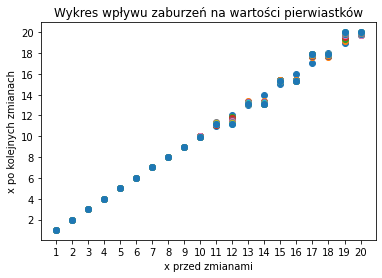

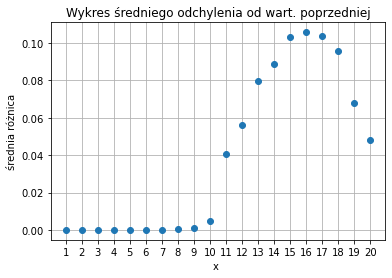

In [4]:
#1.
def polly_A(x: np.ndarray):

    if type(x) is not np.ndarray:
        return None
    return P.polyfromroots(x)


#2.
def roots_20(a: np.ndarray):

    if type(a) is not np.ndarray:
        return None
    for i in range(0,len(a)):
        a[i] = a[i] + 10**(-10)*np.random.random_sample()
    x = P.polyroots(a)
    return a, x

x = np.arange(1,21)
x_base = np.arange(1,21)
wsp = polly_A(x)


#3.
av_dif = np.zeros(20) # średnia różnica od bazowego x
fig, ax1 = plt.subplots()
ax1.plot(x_base, x, 'o')
iterations = 20
for i in range(iterations):
    x_old = x
    wsp, x = roots_20(wsp) #TO
    ax1.plot(x_base,x,'o')
    for j in range(iterations):
        av_dif[j] += np.abs(x[j] - x_old[j])/iterations


ax1.set(xlabel="x przed zmianami",ylabel="x po kolejnych zmianach",title="Wykres wpływu zaburzeń na wartości pierwiastków")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.yticks([2,4,6,8,10,12,14,16,18,20])
plt.show()

#4. pod wykresami

#5.
fig, ax1 = plt.subplots()
ax1.plot(x_base, av_dif, 'o')
ax1.set(xlabel="x ",ylabel="średnia różnica",title="Wykres średniego odchylenia od wart. poprzedniej")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.grid('on')
plt.show()

4. Najmniej odporny na zmiany jest pierwiastek x = 19, zaraz po nim jest x = 12. Ogólnie zmiany widać dla x>10.
5. Aby oszacować uwarunkowanie możemy posłużyć się powyższym wykresem, który prezentuje średnie odchylenie od wart. poprzedniej. Najgorzej uwarunkowane są pierwiastki z przedziału <14,19>.

***Zadanie 2.***  
Dany jest wielomian $w_1(x)=(x-1)^8$. Wyznacz numerycznie miejsca zerowego tego wielomianu poprzez wyznaczenie wartości własnych macierzy Frobeniusa. W związku z tym wykonaj następujące czynności:  

1. Zaiplementuj funkcję tworzącą [macierz Frobenusa](https://github.com/KAIR-ISZ/public_lectures/blob/master/Metody%20Numeryczne%202019/Lecture%204%20(nonlinear%20equations)/Metody%20numeryczne%202019%20-%20R%C3%B3wnania%20nieliniowe.pdf) *frob_a*, dla zadanego wektora współczynników wielomianu $w(x)$.  
2. Wyznacz wartości własne przekształconej macierzy za pomocą funkcji [eigvals](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html#numpy.linalg.eigvals).  
3. Dokonaj rozkładu Schura macierzy zdefiniowanej w punkcie 1. użyj funkcji [schure](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.schur.html#scipy.linalg.schur).  
4. Porównaj wyniki z funkcją polyroots.

### Rozwiązanie Zadania 2.

In [10]:
def frob_a(wsp: np.ndarray):

    if type(wsp) is not np.ndarray:
        return None
    n = len(wsp)
    frob_matrix = np.zeros((n,n))
    
    for i in range(n):
        for j in range(n):
            if i==j-1:
                frob_matrix[i][j] = 1
    frob_matrix[n-1] = -wsp
    eigenvalues= np.linalg.eigvals(frob_matrix)
    schur = scipy.linalg.schur(frob_matrix)

    wsp_all = np.concatenate((np.ndarray(1),wsp))
    polyroot_result = P.polyroots(wsp_all)

    return frob_matrix, eigenvalues, schur, polyroot_result


x = np.ones(8) #Przygotowuje wektor zgodnie z zadanym wielomianem

wsp = polly_A(x) #Liczę współczynniki postaci ogólnej
a = wsp[0:len(wsp)-1] #Obcinam wektor współczynników z wartości an

frob, _, _, _ = frob_a(a)

#2.
eigen = np.linalg.eigvals(frob)

#3.
T, Z = scipy.linalg.schur(frob)

#4.
x_from_polyroots = P.polyroots(wsp) 

print("Wartości własne macierzy Frobeniusa:\n", eigen, "\n Największy błąd bezwzględny: ", np.max(np.abs(eigen-1)))
print("\n\nZ rozkładu Schura:\n", np.diag(T), "\n Największy błąd bezwzględny: ", np.max(np.abs(np.diag(T)-1)))
print("\n\nZ funkcji polyroots():\n", x_from_polyroots, "\n Największy błąd bezwzględny: ", np.max(np.abs(x_from_polyroots-1)))

Wartości własne macierzy Frobeniusa:
 [1.01724918+0.j         1.01205146+0.01225803j 1.01205146-0.01225803j
 0.99979165+0.01704337j 0.99979165-0.01704337j 0.9879485 +0.01184127j
 0.9879485 -0.01184127j 0.98316762+0.j        ] 
 Największy błąd względny:  0.017249175508910586


Z rozkładu Schura:
 [1.01900164 1.01334571 1.01334571 0.99987407 0.99987407 0.98665427
 0.98665427 0.98125025] 
 Największy błąd względny:  0.019001642226469162


Z funkcji polyroots():
 [0.98790713-0.00487797j 0.98790713+0.00487797j 0.99467836-0.01209618j
 0.99467836+0.01209618j 1.00488551-0.01253168j 1.00488551+0.01253168j
 1.012529  -0.00531473j 1.012529  +0.00531473j] 
 Największy błąd względny:  0.013609640903816004


Wnioski: Porównując działanie eigenvals() oraz schur() do funkcji polyroots() możemy zaobserwować, że dokładność wyznaczania pierwiastków różni się dopiero na 3 miejscu po przecinku a więc nieznacznie.

***Zadanie 3.***  
Dla danego wielomianu $w_2(x) = 243x^7-486x^6+783x^5-990x^4+558x^3-28x^2-72x+16$ wyznacz miejsca zerowe numerycznie, w taki sam sposób jak w zadaniu 2.


### Rozwiązanie Zadania 3.

In [15]:
wsp = np.array([16, -72, -28, 558, -990, 783, -486, 243]) #Współczynniki zadanego wielomianu
a = wsp[0:len(wsp)-1]/243 #Obcinam wektor współczynników z wartości an i dzielę przez tą wartość (aby móc podać do funkcji frob_a(a) poprawny wektor)

frob, _, _, _ = frob_a(a)

#2
eigen = np.linalg.eigvals(frob)

#3
T, Z = scipy.linalg.schur(frob)

#4
x_from_polyroots = P.polyroots(wsp) 

print("Wartości własne macierzy Frobeniusa:\n", eigen)
print("\n\nZ rozkładu Schura:\n", np.diag(T))
print("\n\nZ funkcji polyroots():\n", x_from_polyroots)

Wartości własne macierzy Frobeniusa:
 [ 7.21644966e-16+1.41421356e+00j  7.21644966e-16-1.41421356e+00j
 -3.33333333e-01+0.00000000e+00j  6.66668150e-01+2.56989064e-06j
  6.66668150e-01-2.56989064e-06j  6.66663699e-01+0.00000000e+00j
  3.33333333e-01+0.00000000e+00j]


Z rozkładu Schura:
 [ 4.02455846e-16  4.02455846e-16 -3.33333333e-01  6.66676254e-01
  6.66661873e-01  6.66661873e-01  3.33333333e-01]


Z funkcji polyroots():
 [-3.33333333e-01+0.00000000e+00j  9.15933995e-16-1.41421356e+00j
  9.15933995e-16+1.41421356e+00j  3.33333333e-01+0.00000000e+00j
  6.66662110e-01+0.00000000e+00j  6.66668945e-01-3.94647644e-06j
  6.66668945e-01+3.94647644e-06j]


Wnioski: Najgorzej działa metoda rozkładu Schura, ponieważ zwraca tylko rzeczywiste wartości pierwiastków (nie uwzględnia w ogóle liczb zespolonych). Polyroots oraz Frobenius działa podobnie dobrze.

***Zadanie 4.***

Dany jest wielomian: 
$$
w_3(x)= x^5 - 156x^4 - 5x^3 + 780x^2 + 4x - 624
$$.
 Wiedząc, że wielomian ten w postaci szeregu Czebyszewa jest następujący 
 $$w_3(x)= (a_0+\frac{a_2}{2}+ \frac{3a_4}{4})T_0(x)+(a_1+\frac{3a_3}{4}+ \frac{5a_5}{8})T_1(x)+(\frac{a_2}{2}+ \frac{a_4}{4})T_2(x)+(\frac{a_3}{4}+ \frac{5a_5}{16})T_3(x)+ (\frac{a_4}{8})T_4 + (\frac{a_5}{16})T_5(x)$$ 
 znajdź pierwiastki wykorzystując funkcję [chebroots](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.chebyshev.chebroots.html).

### Rozwiązanie Zadania 4.

In [16]:
a = np.array([-624, 4, 780, -5, -156, 1])
c = np.zeros(6)

c[0] = a[0] + a[2]/2 + 3*a[4]/4
c[1] = a[1] + 3*a[3]/4 + 5*a[5]/8
c[2] = a[2]/2 + a[4]/4
c[3] = a[3]/4 + 5*a[5]/16
c[4] = a[4]/8
c[5] = a[5]/16

x = np.polynomial.chebyshev.chebroots(c)

print("Wyniki działania funkcji chebroots: \n", x)

Wyniki działania funkcji chebroots: 
 [ -2.1113158   -1.01778383   1.01798385   2.11432153 155.99679425]


Wnioski: Funkcja wykorzystująca wielomian Czybyszewa działa całkiem dobrze. Największy błąd bezwzględny jaki uzyskaliśmy to 0.11 a więc możemy ją stosować, aby zorientować się, gdzie leżą rozwiązania (wartości wyznaczone przez Wolframa to -2, 2, -1, 1, 156). Dokładność tej metody jest nieco gorsza od dokładności poprzednich metod, jednak nieznacznie.